# COMPSCI 371D Homework 8

Write the names of all contributors to this assignment here:

+ ...
+ ...

## Part 1: 

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

with open('trivial.pickle', 'rb') as file:
    trivial = pickle.load(file)

### Problem 1.1

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

def evaluate(h, train, test, description):
    def accuracy(predictor, s):
        sx, sy = s['x'], s['y']
        return predictor.score(sx, sy) * 100

    performance = {
        'description': description,
        'training accuracy': accuracy(h, train),
        'test accuracy': accuracy(h, test)
    }
    f = '{:s}: training accuracy is {:.2f} percent,' +\
        '\ntest accuracy is {:.2f} percent'
    print(f.format(description, performance['training accuracy'],
                   performance['test accuracy']))
    return performance

Number of support vectors:  3


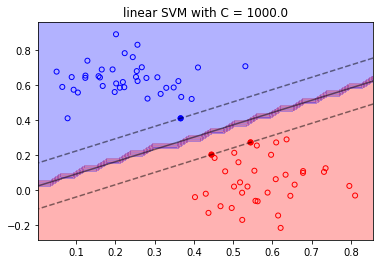

linear SVM with C = 1000.0: training accuracy is 100.00 percent,
test accuracy is 100.00 percent


In [88]:
def experiment(data_set, classifier_name, classifier, hyper_parameters, folds=15, display=False):
    train, test = data_set['train'], data_set['test']
    c = GridSearchCV(classifier, hyper_parameters, scoring='accuracy', cv=folds, iid=False)
    h = c.fit(train['x'], train['y'])
    parm_string = ', '.join(['{} = {}'.format(key, h.best_params_[key])
                             for key in hyper_parameters.keys()])
    description = '{} with {}'.format(classifier_name, parm_string)
    if display:
        show_data(h.best_estimator_, train, description)
    evaluate(h.best_estimator_, train, test, description)

n_folds, display = 15, True
experiment(trivial, 'linear SVM', SVC(kernel='linear', gamma='auto'),
               hyper_parameters={'C': [1000.]}, folds=n_folds, display=display)

In [87]:
def show_data(h, data_set, description):
    # we create 40 separable points
    x = data_set["x"]
    y = data_set["y"]
    
    colors = []
    for el in y:
        if el == -1:
            colors.append('red')
        else:
            colors.append('blue')
    
    predictions = h.predict(x)
    correct = []
    incorrect = []
    correct_colors = []
    incorrect_colors = []
    
    for i in range(len(y)):
        actual = y[i]
        prediction = predictions[i]
        color = "blue" if prediction == 1 else "red"
        if prediction == actual:
            correct.append(x[i])
            correct_colors.append(color)
        else:
            incorrect.append(x[i])
            incorrect_colors.append(color)
    
    correct = np.array(correct)
    incorrect = np.array(incorrect)

    if len(correct) > 0:
        plt.scatter(correct[:, 0], correct[:, 1], edgecolors=correct_colors,
                facecolors='none', s=25, cmap=plt.cm.Paired)
    if len(incorrect) > 0:
        plt.scatter(incorrect[:, 0], incorrect[:, 1], edgecolors=incorrect_colors,
                facecolors='none', s=25, cmap=plt.cm.Paired, marker='v')
    
    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = h.decision_function(xy).reshape(XX.shape)


    
    if hasattr(h, 'support_'):
        # plot decision boundary and margins
        ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
        colors = []
        for el in h.support_vectors_:
            val = h.predict([ [el[0], el[1]] ])[0]
            if val == -1:
                colors.append('red')
            else:
                colors.append('blue')
        print('Number of support vectors: ', len(h.support_vectors_))
        # plot support vectors
        ax.scatter(h.support_vectors_[:, 0], h.support_vectors_[:, 1], s=25,
                   linewidth=1, c=colors)
    else:
        ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5, linestyles=['-'])

    # color background
    X, Y = np.meshgrid(xx, yy)
    Z = []
    for i in range(len(X)):
        temp = []
        for j in range(len(X[0])):
            x_val = X[i][j]
            y_val = Y[i][j]
            predict = h.predict([ [x_val, y_val] ])[0]
            temp.append(predict)
        Z.append(temp)


    plt.contourf(X, Y, Z,alpha = 0.3, colors = ['red','blue'])
    plt.title(description)
    
    plt.show()

### Problem 1.2 (Exam-Style)

## Part 2: 

In [74]:
import matplotlib.pyplot as plt
%matplotlib inline

with open('data.pickle', 'rb') as file:
    data = pickle.load(file)

### Problem 2.1

In [15]:
c_values = [0.0001, 0.001, 0.01, 0.1, 1., 10., 100.]

In [16]:
n_folds, display = 15, True

<class 'numpy.ndarray'>


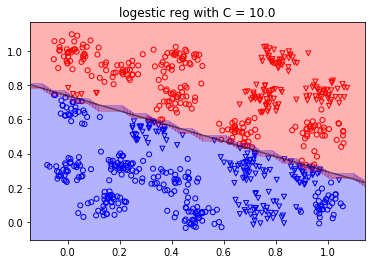

logestic reg with C = 10.0: training accuracy is 63.60 percent,
test accuracy is 69.20 percent


In [79]:
from sklearn.linear_model import LogisticRegression

experiment(data, 'logestic reg', LogisticRegression(solver='lbfgs'),
               hyper_parameters={'C': c_values}, folds=n_folds, display=display)

### Problem 2.2

Number of support vectors:  614


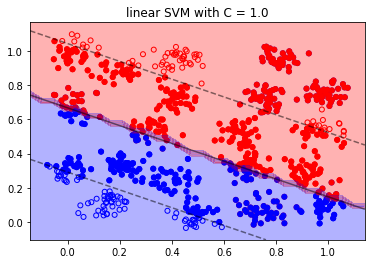

linear SVM with C = 1.0: training accuracy is 71.33 percent,
test accuracy is 77.60 percent


In [46]:
experiment(data, 'linear SVM', SVC(kernel='linear', gamma='auto'),
               hyper_parameters={'C': c_vaexperiment(data, 'poly SVM', SVC(kernel='poly', gamma='auto'),hyper_parameters={'C': [0.0001, 0.001, 0.01, 0.1, 1., 10., 100.], "degree": [2,3,4,5,6,7]}, folds=n_folds, display=True)lues}, folds=n_folds, display=True)

### Problem 2.3 (Exam-Style)

Number of support vectors:  606


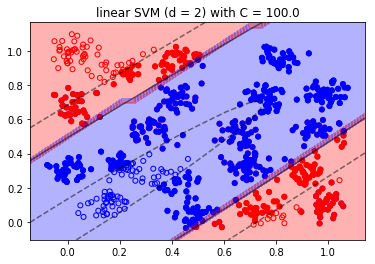

linear SVM (d = 2) with C = 100.0: training accuracy is 64.93 percent,
test accuracy is 62.40 percent
Number of support vectors:  544


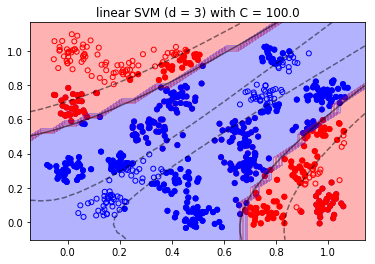

linear SVM (d = 3) with C = 100.0: training accuracy is 68.67 percent,
test accuracy is 66.00 percent
Number of support vectors:  497


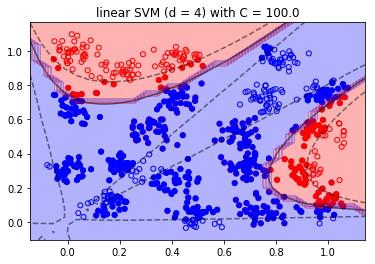

linear SVM (d = 4) with C = 100.0: training accuracy is 70.67 percent,
test accuracy is 73.60 percent
Number of support vectors:  486


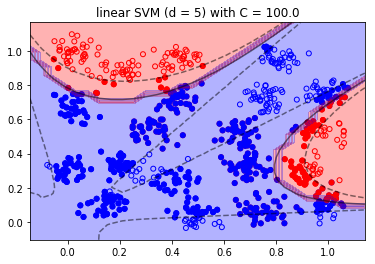

linear SVM (d = 5) with C = 100.0: training accuracy is 72.13 percent,
test accuracy is 76.40 percent
Number of support vectors:  494


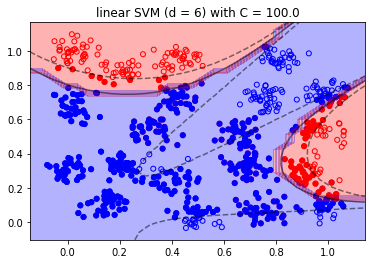

linear SVM (d = 6) with C = 100.0: training accuracy is 72.80 percent,
test accuracy is 75.60 percent
Number of support vectors:  518


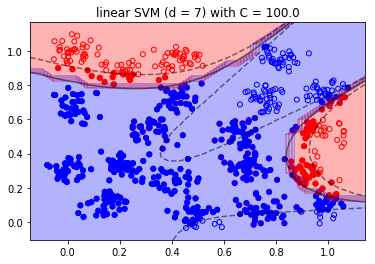

linear SVM (d = 7) with C = 100.0: training accuracy is 72.40 percent,
test accuracy is 74.40 percent


In [51]:
for i in range(2,8):
    experiment(data, 'linear SVM (d = {})'.format(i), SVC(kernel='poly', degree=i, gamma='auto'),
               hyper_parameters={'C': c_values}, folds=n_folds, display=True)

### Problem 2.4

Number of support vectors:  494


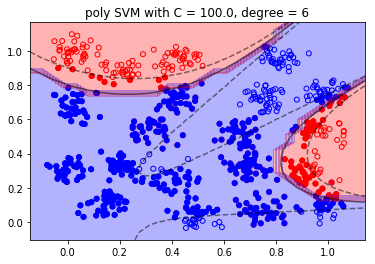

poly SVM with C = 100.0, degree = 6: training accuracy is 72.80 percent,
test accuracy is 75.60 percent


In [50]:
experiment(data, 'poly SVM', SVC(kernel='poly', gamma='auto'),
           hyper_parameters={'C': [0.0001, 0.001, 0.01, 0.1, 1., 10., 100.], "degree": [2,3,4,5,6,7]},
           folds=n_folds, display=True)

### Problem 2.5

### Problem 2.6

Number of support vectors:  219


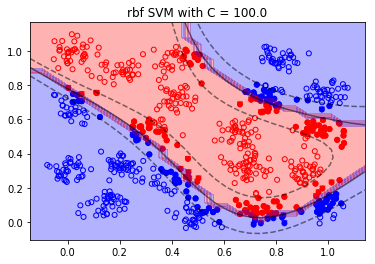

rbf SVM with C = 100.0: training accuracy is 93.33 percent,
test accuracy is 96.40 percent


In [98]:
ds, display = 15, False
experiment(data, 'rbf SVM', SVC(kernel='rbf', gamma='auto'),hyper_parameters={'C': [0.0001, 0.001, 0.01, 0.1, 1., 10., 100.]}, folds=n_folds, display=True)

### Problem 2.7 (Exam-Style)

### Problem 2.8 (Partially Exam-Style)